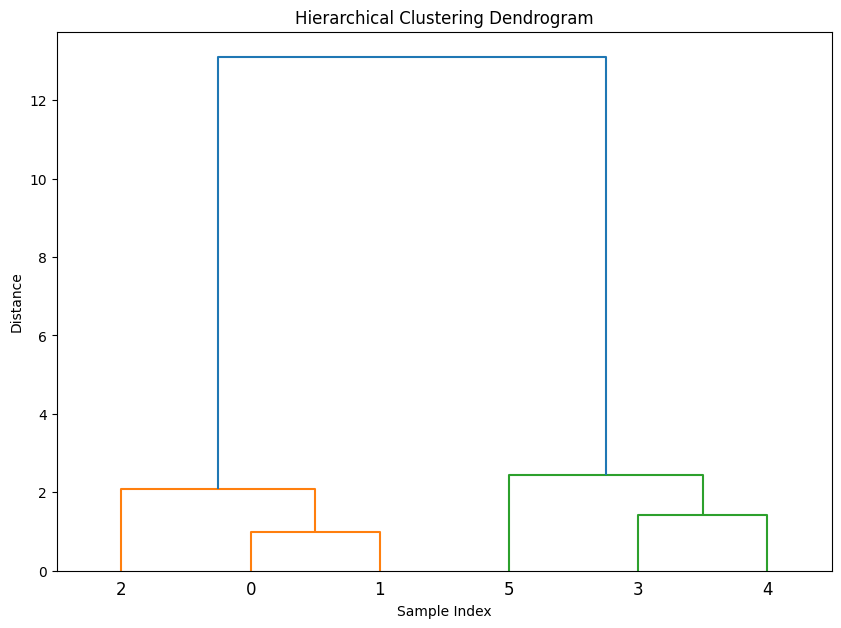

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Example dataset (you can replace this with your own dataset)
data = pd.DataFrame({
    'x': [1, 2, 3, 6, 7, 8],
    'y': [1, 1, 2, 6, 7, 8]
})

# Step 1: Compute the pairwise distances between points
dist_matrix = pdist(data.values)  # Pairwise distance matrix

# Step 2: Convert the distance matrix into a square form (a symmetric matrix)
dist_matrix_square = squareform(dist_matrix)

# Step 3: Initialize clusters, each point is its own cluster
clusters = {i: [i] for i in range(len(data))}  # Initially each point is a cluster
cluster_labels = list(range(len(data)))

# Step 4: Hierarchical Clustering
def hierarchical_clustering(dist_matrix_square, clusters, k=2):
    # Perform Agglomerative Clustering
    while len(clusters) > k:
        # Find the two closest clusters (smallest distance in the matrix)
        min_dist = np.inf
        pair_to_merge = None
        for i in clusters:
            for j in clusters:
                if i < j:
                    dist = dist_matrix_square[i, j]
                    if dist < min_dist:
                        min_dist = dist
                        pair_to_merge = (i, j)
        
        # Merge the two closest clusters
        cluster_i, cluster_j = pair_to_merge
        new_cluster = clusters[cluster_i] + clusters[cluster_j]
        del clusters[cluster_i]
        del clusters[cluster_j]
        
        # Add the new merged cluster
        new_cluster_index = len(clusters)
        clusters[new_cluster_index] = new_cluster
        
        # Update the distance matrix for the new cluster
        for i in clusters:
            if i != new_cluster_index:
                dist_matrix_square[new_cluster_index, i] = min(dist_matrix_square[cluster_i, i], dist_matrix_square[cluster_j, i])
                dist_matrix_square[i, new_cluster_index] = dist_matrix_square[new_cluster_index, i]
        
        # Mark the new cluster's label
        cluster_labels.append(new_cluster_index)
    
    return clusters, dist_matrix_square

# Run hierarchical clustering to get the clusters
k = 2  # You can adjust the number of clusters
clusters, dist_matrix_square = hierarchical_clustering(dist_matrix_square, clusters, k)

# Step 5: Plot the Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage
Z = linkage(data.values, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
